In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Numerical parameters
eps = 1e-12

## Global Parameters

In [2]:
# Non-dimensional parameters
# Damkohler numbers
Dam_tr = 1.0
Dam_ci = 1.0

# Peclet numbers
Pen_tr = 10.0
Pen_ci = 10.0

# Biot numbers
Bit_tr = 1.0e3
Bit_ci = 3.33

# Switching rate
k_tr = 1.0
k_ci = 30 * k_tr

chi_tr = 30.0
chi_ci = 1.0

print(k_tr * chi_tr, k_ci * chi_ci)

assert k_tr * chi_tr == k_ci * chi_ci

30.0 30.0


In [3]:
# Other parameters
# Length of the cell
L = 1.0

## Leading Order

### Setting Additional Parameters

In [4]:
# Setup required parameters
alpha = Dam_ci / Dam_tr
eta = Pen_tr / Pen_ci
zeta = Pen_tr * Dam_tr + Pen_ci * Dam_ci
beta = Bit_tr / Bit_ci
xi = Pen_ci * Bit_tr
phi = Dam_tr / Bit_tr

### Apply Boundary Conditions

In [5]:
# Quadratic coefficients
a = (
    ((eta - 1) / np.sqrt(zeta)) * np.sinh(np.sqrt(zeta)) * np.cosh(np.sqrt(zeta))
    * (eta * (xi * (1 + alpha) * beta + 1) * k_tr - (xi * (1 + alpha) + 1) * k_ci)
)

b = (
    (1 + alpha) * np.cosh(np.sqrt(zeta))
    * (eta * (xi * (1 + alpha) * beta + 1) * k_tr - (xi * (1 + alpha) + 1) * k_ci)
    + ((eta - 1) / np.sqrt(zeta)) * np.sinh(np.sqrt(zeta))
    * (alpha * (xi * (1 + alpha) * beta + 1) * k_tr + (xi * (1 + alpha) + 1) * k_ci)
)

c = (1 + alpha) * (alpha * (xi * (1 + alpha) * beta + 1) * k_tr + (xi * (1 + alpha) + 1) * k_ci)

d = (
    ((eta - 1) / np.sqrt(zeta)) * np.sinh(np.sqrt(zeta))
    + (1 / (chi_tr * k_tr) - 1 / (2 * L)) * np.cosh(np.sqrt(zeta))
    * (eta * (xi * (1 + alpha) * beta + 1) * k_tr - (xi * (1 + alpha) + 1) * k_ci)
)

e = (
    (1 + alpha)
    + (1 / (chi_tr * k_tr) - 1 / (2 * L))
    * (alpha * (xi * (1 + alpha) * beta + 1) * k_tr + (xi * (1 + alpha) + 1) * k_ci)
)

f = -1 / (2 * L)

p = (
    chi_ci * k_ci * np.sqrt(zeta) * np.sinh(np.sqrt(zeta)) * np.cosh(np.sqrt(zeta))
    * (
        ((1 + alpha) / xi) * (k_tr * beta * eta - k_ci)
        + ((alpha + eta) / zeta) * (k_tr * eta - k_ci)
    )
)

q = (
    chi_ci * k_ci * np.sqrt(zeta) * np.sinh(np.sqrt(zeta))
    * (
        alpha * k_tr * (((1 + alpha) * beta) / xi + (alpha + eta) / zeta)
        + k_ci * ((1 + alpha) / xi + (alpha + eta) / zeta)
    )
)

r = (
    chi_ci * k_ci * np.sqrt(zeta) * np.sinh(np.sqrt(zeta))
    * ((1 + alpha * beta) / xi + (alpha + eta) / zeta)
    + np.cosh(np.sqrt(zeta)) * (eta * k_tr + alpha * k_ci)
)

s = alpha * (k_tr - k_ci)

In [7]:
# Solve for B_1
poly = np.poly1d([
    a * q**2 - b * p * q + c * p**2,
    2 * a * q * s - b * p * s - b * q * r + 2 * c * p * r + d * q**2 - e * p * q,
    a * s**2 - b * r * s + c * r**2 + 2 * d * q * s - e * p * s - e * q * r + f * q**2,
    d * s**2 - e * r * s + 2 * f * q * s,
    f * s**2
])
roots = poly.r
print(roots)

[ 7.61431154e-03  2.26116489e-03  1.21477049e-03 -1.48838893e-09]


In [22]:
# Select a root
B_1 = roots[2]

In [23]:
# Solve for B_0
B_0 = -(p * B_1**2 + r * B_1) / (q * B_1 + s)

### Solutions to Leading Order

In [24]:
# Bulk concentrations
def c_tr(y):
    return alpha * B_0 + eta * B_1 * np.cosh(y * np.sqrt(zeta))

def c_ci(y):
    return B_0 - B_1 * np.cosh(y * np.sqrt(zeta))

# Surface concentrations
Delta = phi * (1 + alpha) * (beta * k_tr * c_tr(1) + k_ci * c_ci(1)) + k_tr * c_tr(1) + k_ci * c_ci(1) + 1

gamma_tr = (phi * (beta * k_tr * c_tr(1) + k_ci * c_ci(1)) * alpha + k_tr * c_tr(1)) / Delta

gamma_ci = (phi * (beta * k_tr * c_tr(1) + k_ci * c_ci(1)) + k_ci * c_ci(1)) / Delta

assert abs((gamma_tr + gamma_ci) - (1 - 1 / Delta)) < eps

print(gamma_tr, gamma_ci)

0.054983506446800876 0.7995411048960009


### Solution Plots to Leading Order

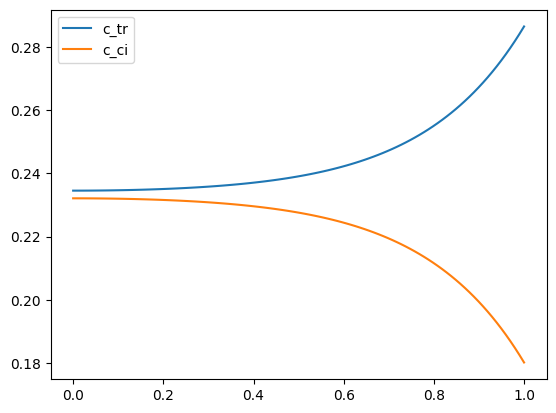

In [25]:
yy = np.linspace(0, 1, 100)

plt.plot(yy, c_tr(yy), label="c_tr")
plt.plot(yy, c_ci(yy), label="c_ci")
plt.legend()
plt.show()

## First Order